<a href="https://colab.research.google.com/github/dayanavivolab/praat_examples/blob/master/formants_from_praat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install praat-parselmouth

import os
import numpy as np
from scipy.io import wavfile
import parselmouth 
from parselmouth.praat import call
from IPython.display import Audio
import matplotlib.pyplot as plt 

     |████████████████████████████████| 10.7MB 6.6MB/s 


In [4]:
!wget http://dihana.cps.unizar.es/~dribas/5-CH0.wav

--2021-04-21 20:53:01--  http://dihana.cps.unizar.es/~dribas/5-CH0.wav
Resolving dihana.cps.unizar.es (dihana.cps.unizar.es)... 155.210.153.34
Connecting to dihana.cps.unizar.es (dihana.cps.unizar.es)|155.210.153.34|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 108014 (105K) [audio/x-wav]
Saving to: ‘5-CH0.wav’

5-CH0.wav           100%[===================>] 105.48K   114KB/s    in 0.9s    

2021-04-21 20:53:02 (114 KB/s) - ‘5-CH0.wav’ saved [108014/108014]



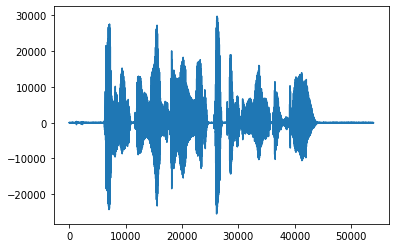

In [5]:
fs, x = wavfile.read('5-CH0.wav')
plt.plot(x)
Audio(x,rate=fs)

In [9]:
def formants_praat(x, fs):
        f0min, f0max  = 75, 300
        sound = parselmouth.Sound(x, sampling_frequency=fs) # read the sound
        pitch = sound.to_pitch()
        f0 = pitch.selected_array['frequency']
        formants = sound.to_formant_burg(time_step=0.010, maximum_formant=5000)
        
        f1_list, f2_list, f3_list, f4_list  = [], [], [], []
        for t in formants.ts():
            f1 = formants.get_value_at_time(1, t)
            f2 = formants.get_value_at_time(2, t)
            f3 = formants.get_value_at_time(3, t)
            f4 = formants.get_value_at_time(4, t)
            if np.isnan(f1): f1 = 0
            if np.isnan(f2): f2 = 0
            if np.isnan(f3): f3 = 0
            if np.isnan(f4): f4 = 0
            f1_list.append(f1)
            f2_list.append(f2)
            f3_list.append(f3)
            f4_list.append(f4)
            
        return f0, f1_list, f2_list, f3_list, f4_list

In [10]:
f0, f1, f2, f3, f4 = formants_praat(x,fs)

Text(0, 0.5, 'formants(Hz)')

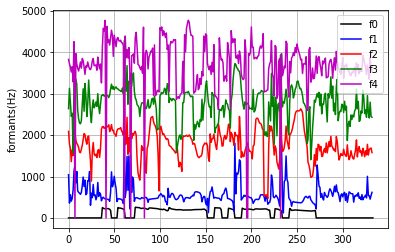

In [11]:
plt.plot(f0,'k')
plt.plot(f1,'b')
plt.plot(f2,'r')
plt.plot(f3,'g')
plt.plot(f4,'m')
plt.legend(['f0','f1','f2','f3','f4'])
plt.grid(True)
plt.ylabel('formants(Hz)')